Bayesian Mean Estimate 

In [1]:
# import libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

from pathlib import Path

from BME import run_BME, run_BME_benchmark


# Global plot style settings
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["DejaVu Serif"],
    "mathtext.fontset": "cm",            # Use Computer Modern for math
    "font.size": 14,                     # Base font size
    "axes.labelsize": 16,                # Axis label font size
    "axes.titlesize": 16,                # Title font size
    "legend.fontsize": 13,               # Legend font size
    "xtick.labelsize": 13,               # X tick label size
    "ytick.labelsize": 13,               # Y tick label size
    "axes.linewidth": 1.2,               # Thicker axis lines
    "xtick.direction": "in",             # x-yick direction
    "ytick.direction": "in",             # y-tick direction
    "text.usetex": False,                # Enable LaTeX if needed
    "figure.dpi": 150,                   # Good resolution for screens
    "savefig.dpi": 300                   # High resolution for saving
})

In [2]:
# Define function for nice plotting
def PlotSettings(ax, gridlines=False, minimalist=False):
    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    # Minimalist style
    if minimalist:
        # Hide top and right spines (borders)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        # Ticks only on bottom and left
        ax.tick_params(which='both', top=False, right=False)
    else:
        # Tick parameters
        ax.tick_params(which='both', direction='in', top=True, right=True)
        ax.tick_params(which='major', length=7, width=1.2)
        ax.tick_params(which='minor', length=4, width=1)
    # Optional grid
    if gridlines:
        ax.grid(True, which="major", linestyle="--", linewidth=0.6, alpha=0.7)
        ax.grid(True, which="minor", linestyle=":", linewidth=0.5, alpha=0.4)

In [3]:
# Loading data
parent = Path(os.path.dirname(os.getcwd()))
date = "091027"
state = "cat2"

data_path = parent / "data" / "dataframes" / date
print(data_path)
data = pd.read_csv(data_path / (state + '.csv'))
# Convert to numpy array
x_values = np.array(data)
x_values = np.swapaxes(x_values, 0, 1)

# Make array from 0 to 165 in steps of 15
thetas = np.arange(0, 166, 15)
# Convert to radians
thetas = np.radians(thetas)
theta0 = np.deg2rad(147)
x0 = -0.08

theta0 = 0
x0 = 0

N = 10
nrho = 10000
num_bins = 200
eps=0.001

rho_est, logL_chain = run_BME(thetas-theta0, 
              x_values-x0,
              num_bins=num_bins,
              nrho=nrho,
              N=N,
              epsilon=eps
              )

print(rho_est)
#np.save("rho_est.npy", rho_est)



/Users/jansc/Documents/QIS/Spring2025/SCIQIS/Homodyne-Tomography/data/dataframes/091027
Computing Markov chain...



100%|██████████| 10000/10000 [00:02<00:00, 4358.03it/s]

[[ 2.47948194e-01+0.00000000e+00j  3.90253760e-02-3.61742761e-03j
   5.54484721e-02-1.29042773e-01j -7.76923836e-03-4.17434782e-03j
  -2.94153580e-02-3.24031394e-02j  5.19956911e-03-1.49825059e-03j
  -1.14939625e-02+2.61678729e-03j  2.49386116e-04-2.44496838e-03j
  -8.82105643e-04+4.33723299e-03j -3.03498552e-04-6.32544010e-04j]
 [ 3.90253760e-02+3.61742761e-03j  5.20434253e-01+0.00000000e+00j
  -6.63055085e-02-6.62450179e-02j  6.72542617e-02-1.38998336e-01j
  -4.54639621e-02+1.79076862e-02j -2.06980048e-02-2.87971428e-02j
  -7.95083302e-04+2.08996796e-02j -6.76701499e-03-1.07429775e-04j
   3.14961818e-03+2.80870324e-03j -6.57541011e-04-4.49033840e-05j]
 [ 5.54484721e-02+1.29042773e-01j -6.63055085e-02+6.62450179e-02j
   1.27554461e-01+0.00000000e+00j  2.70893327e-04+2.30367663e-02j
   1.93818708e-02-4.06815591e-02j  7.43915119e-03+5.66583611e-03j
  -8.10255548e-03-1.07166599e-02j  2.87786574e-03-1.09822343e-03j
  -4.28708040e-03+8.90510957e-04j  5.08919644e-04-5.19924399e-04j]
 [-7.76

In [4]:
from WignerDensity import rho_to_Wigner

# Define function for nice plotting
def PlotSettings(ax, gridlines=False, minimalist=False):
    # Minor ticks
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    # Minimalist style
    if minimalist:
        # Hide top and right spines (borders)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        # Ticks only on bottom and left
        ax.tick_params(which='both', top=False, right=False)
    else:
        # Tick parameters
        ax.tick_params(which='both', direction='in', top=True, right=True)
        ax.tick_params(which='major', length=7, width=1.2)
        ax.tick_params(which='minor', length=4, width=1)
    # Optional grid
    if gridlines:
        ax.grid(True, which="major", linestyle="--", linewidth=0.6, alpha=0.7)
        ax.grid(True, which="minor", linestyle=":", linewidth=0.5, alpha=0.4)

def plot_Wigner(rho_est):
    # Plot Wigner function
    xvec = np.linspace(-4, 4, 200)
    W = rho_to_Wigner(rho_est, xvec, xvec)
    X, Y = np.meshgrid(xvec, xvec)
    vmin, vmax = -1/np.pi, 1/np.pi
    levels = np.linspace(vmin, vmax, 41)  # force levels across full range

    fig, ax = plt.subplots(figsize=(6, 5))
    # Filled contours with transparency
    contour_filled = ax.contourf(X, Y, W, levels=levels,
                                cmap='seismic', alpha=0.8, vmin=vmin, vmax=vmax)
    # Colorbar
    cbar = fig.colorbar(contour_filled, ax=ax, ticks=[-1/np.pi, 1/np.pi])
    cbar.ax.set_yticklabels([r"$-1/\pi$", r"$1/\pi$"])  # custom tick labels if needed
    # Move axes to cross at (0,0)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    # Set x- and y-ticks skipping 0
    ax.set_xticks([-3, -2, -1, 1, 2, 3])
    ax.set_yticks([-3, -2, -1, 1, 2, 3])
    PlotSettings(ax, minimalist=True)
    plt.show()

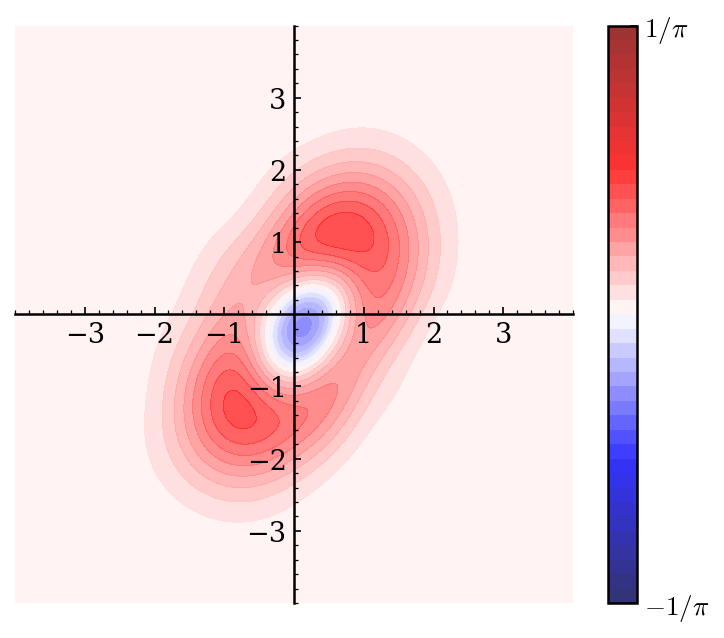

In [5]:
plot_Wigner(rho_est)

In [6]:
N_values = [i for i in range(3, 11)]
nbin_values = [i*20 for i in range(3, 11)]

delta_ll, runtime_grid = run_BME_benchmark(
    thetas, x_values, N_values, nbin_values,[10000],

)

Running iMLE for N=3, bins=60
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 9291.21it/s]


Running iMLE for N=3, bins=80
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 8128.25it/s]


Running iMLE for N=3, bins=100
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 8176.75it/s]


Running iMLE for N=3, bins=120
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 7640.89it/s]


Running iMLE for N=3, bins=140
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 7547.45it/s]


Running iMLE for N=3, bins=160
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 7141.30it/s]


Running iMLE for N=3, bins=180
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 8142.81it/s]


Running iMLE for N=3, bins=200
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 7995.29it/s]


Running iMLE for N=4, bins=60
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 9793.46it/s]


Running iMLE for N=4, bins=80
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 9125.01it/s]


Running iMLE for N=4, bins=100
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 8538.78it/s]


Running iMLE for N=4, bins=120
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 8188.02it/s]


Running iMLE for N=4, bins=140
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 8197.70it/s]


Running iMLE for N=4, bins=160
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 7542.98it/s]


Running iMLE for N=4, bins=180
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 7448.73it/s]


Running iMLE for N=4, bins=200
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 6860.12it/s]


Running iMLE for N=5, bins=60
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 9754.74it/s]


Running iMLE for N=5, bins=80
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 8440.06it/s]


Running iMLE for N=5, bins=100
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 8227.91it/s]


Running iMLE for N=5, bins=120
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 7981.35it/s]


Running iMLE for N=5, bins=140
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 6935.73it/s]


Running iMLE for N=5, bins=160
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 6643.71it/s]


Running iMLE for N=5, bins=180
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 6493.14it/s]


Running iMLE for N=5, bins=200
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 6012.38it/s]


Running iMLE for N=6, bins=60
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 9685.35it/s]


Running iMLE for N=6, bins=80
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 8498.92it/s]


Running iMLE for N=6, bins=100
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 8074.60it/s]


Running iMLE for N=6, bins=120
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 7214.24it/s]


Running iMLE for N=6, bins=140
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 6805.94it/s]


Running iMLE for N=6, bins=160
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 6237.73it/s]


Running iMLE for N=6, bins=180
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 5457.20it/s]


Running iMLE for N=6, bins=200
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 5349.42it/s]


Running iMLE for N=7, bins=60
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 8893.85it/s]


Running iMLE for N=7, bins=80
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 7675.98it/s]


Running iMLE for N=7, bins=100
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 7226.02it/s]


Running iMLE for N=7, bins=120
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 6416.55it/s]


Running iMLE for N=7, bins=140
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 5502.72it/s]


Running iMLE for N=7, bins=160
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 5173.89it/s]


Running iMLE for N=7, bins=180
Computing Markov chain...



100%|██████████| 10000/10000 [00:02<00:00, 4903.89it/s]


Running iMLE for N=7, bins=200
Computing Markov chain...



100%|██████████| 10000/10000 [00:02<00:00, 4514.12it/s]


Running iMLE for N=8, bins=60
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 6944.96it/s]


Running iMLE for N=8, bins=80
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 6780.59it/s]


Running iMLE for N=8, bins=100
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 6259.75it/s]


Running iMLE for N=8, bins=120
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 6057.10it/s]


Running iMLE for N=8, bins=140
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 5309.42it/s]


Running iMLE for N=8, bins=160
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 5528.74it/s]


Running iMLE for N=8, bins=180
Computing Markov chain...



100%|██████████| 10000/10000 [00:02<00:00, 4849.43it/s]


Running iMLE for N=8, bins=200
Computing Markov chain...



100%|██████████| 10000/10000 [00:02<00:00, 4944.06it/s]


Running iMLE for N=9, bins=60
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 6625.77it/s]


Running iMLE for N=9, bins=80
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 6237.45it/s]


Running iMLE for N=9, bins=100
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 5520.04it/s]


Running iMLE for N=9, bins=120
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 5280.14it/s]


Running iMLE for N=9, bins=140
Computing Markov chain...



100%|██████████| 10000/10000 [00:02<00:00, 4813.83it/s]


Running iMLE for N=9, bins=160
Computing Markov chain...



100%|██████████| 10000/10000 [00:02<00:00, 4537.22it/s]


Running iMLE for N=9, bins=180
Computing Markov chain...



100%|██████████| 10000/10000 [00:02<00:00, 3958.92it/s]


Running iMLE for N=9, bins=200
Computing Markov chain...



100%|██████████| 10000/10000 [00:02<00:00, 3569.62it/s]


Running iMLE for N=10, bins=60
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 6567.84it/s]


Running iMLE for N=10, bins=80
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 6376.51it/s]


Running iMLE for N=10, bins=100
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 5595.56it/s]


Running iMLE for N=10, bins=120
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 5592.33it/s]


Running iMLE for N=10, bins=140
Computing Markov chain...



100%|██████████| 10000/10000 [00:02<00:00, 4851.42it/s]


Running iMLE for N=10, bins=160
Computing Markov chain...



100%|██████████| 10000/10000 [00:02<00:00, 4406.74it/s]


Running iMLE for N=10, bins=180
Computing Markov chain...



100%|██████████| 10000/10000 [00:02<00:00, 3722.08it/s]


Running iMLE for N=10, bins=200
Computing Markov chain...



100%|██████████| 10000/10000 [00:02<00:00, 4377.14it/s]


In [6]:
def plot_results(delta_ll, runtime_grid, N_values, nbin_values):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

    # First heatmap: Δ log-likelihood
    c0 = axs[0].pcolormesh(nbin_values, N_values, delta_ll, shading="auto", cmap="viridis")
    axs[0].set_title("Δ log-likelihood per sample")
    axs[0].set_xlabel("Number of bins")
    axs[0].set_ylabel("Fock cutoff N")
    axs[0].set_xticks(nbin_values)
    axs[0].set_yticks(N_values)
    fig.colorbar(c0, ax=axs[0])

    # Second heatmap: Runtime
    c1 = axs[1].pcolormesh(nbin_values, N_values, runtime_grid, shading="auto", cmap="magma")
    axs[1].set_title("Runtime (s)")
    axs[1].set_xlabel("Number of bins")
    axs[1].set_ylabel("Fock cutoff N")
    axs[1].set_xticks(nbin_values)
    axs[1].set_yticks(N_values)
    fig.colorbar(c1, ax=axs[1])

    plt.show()

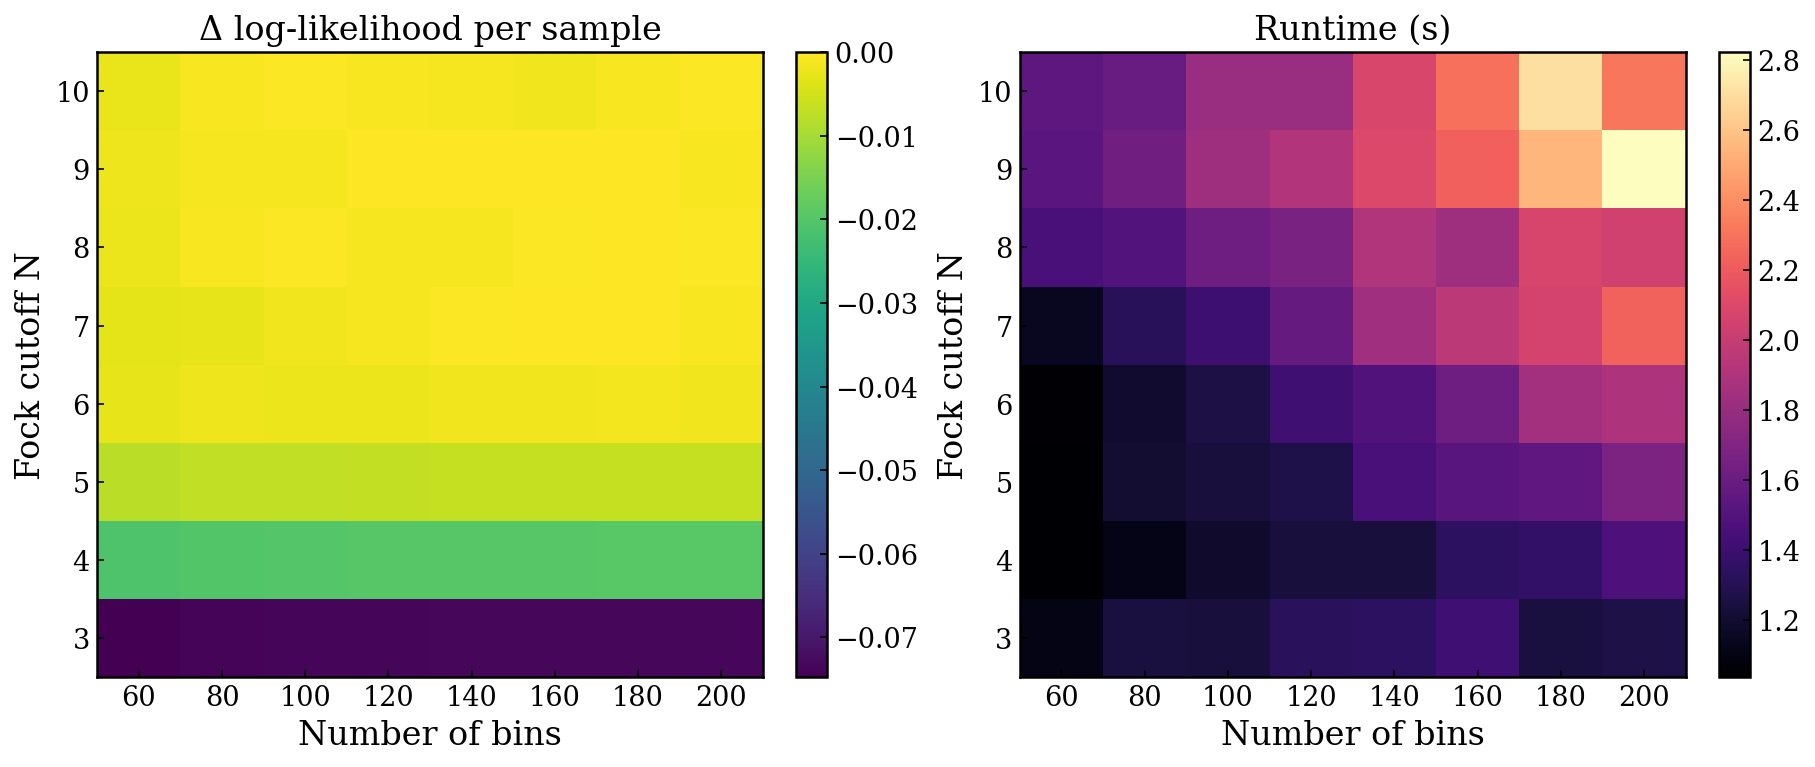

In [8]:
plot_results(delta_ll, runtime_grid, N_values, nbin_values)

In [22]:
N_values = [8]
nbin_values = [160]

nrhos = [500, 1000]+[2000 * i for i in range(1, 11)]  # 1000, 2000, ..., 10000

delta_ll, runtime_grid = run_BME_benchmark(
    thetas, x_values, N_values, nbin_values,nrhos,

)

Running BME for nrho=500
Computing Markov chain...



100%|██████████| 500/500 [00:00<00:00, 4731.40it/s]


Running BME for nrho=1000
Computing Markov chain...



100%|██████████| 1000/1000 [00:00<00:00, 5260.30it/s]


Running BME for nrho=2000
Computing Markov chain...



100%|██████████| 2000/2000 [00:00<00:00, 5020.56it/s]


Running BME for nrho=4000
Computing Markov chain...



100%|██████████| 4000/4000 [00:00<00:00, 5507.08it/s]


Running BME for nrho=6000
Computing Markov chain...



100%|██████████| 6000/6000 [00:01<00:00, 5144.14it/s]


Running BME for nrho=8000
Computing Markov chain...



100%|██████████| 8000/8000 [00:01<00:00, 5390.99it/s]


Running BME for nrho=10000
Computing Markov chain...



100%|██████████| 10000/10000 [00:01<00:00, 5380.06it/s]


Running BME for nrho=12000
Computing Markov chain...



100%|██████████| 12000/12000 [00:02<00:00, 5445.56it/s]


Running BME for nrho=14000
Computing Markov chain...



100%|██████████| 14000/14000 [00:02<00:00, 5354.08it/s]


Running BME for nrho=16000
Computing Markov chain...



100%|██████████| 16000/16000 [00:02<00:00, 5498.85it/s]


Running BME for nrho=18000
Computing Markov chain...



100%|██████████| 18000/18000 [00:03<00:00, 5569.10it/s]


Running BME for nrho=20000
Computing Markov chain...



100%|██████████| 20000/20000 [00:03<00:00, 5490.36it/s]


In [23]:
def plot_results_rho(delta_ll, runtime_grid, nrhos):
    fig, axs = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

    # Flatten arrays to ensure 1D
    delta_ll = np.ravel(delta_ll)
    runtime_grid = np.ravel(runtime_grid)

    # Δ log-likelihood per sample
    axs[0].plot(nrhos, delta_ll, marker='o')
    axs[0].set_title("Δ log-likelihood per sample")
    axs[0].set_xlabel("Number of states (nrhos)")
    axs[0].set_ylabel("Δ log-likelihood")

    # Runtime
    axs[1].plot(nrhos, runtime_grid, marker='o', color='orange')
    axs[1].set_title("Runtime (s)")
    axs[1].set_xlabel("Number of states (nrhos)")
    axs[1].set_ylabel("Runtime (s)")

    plt.show()


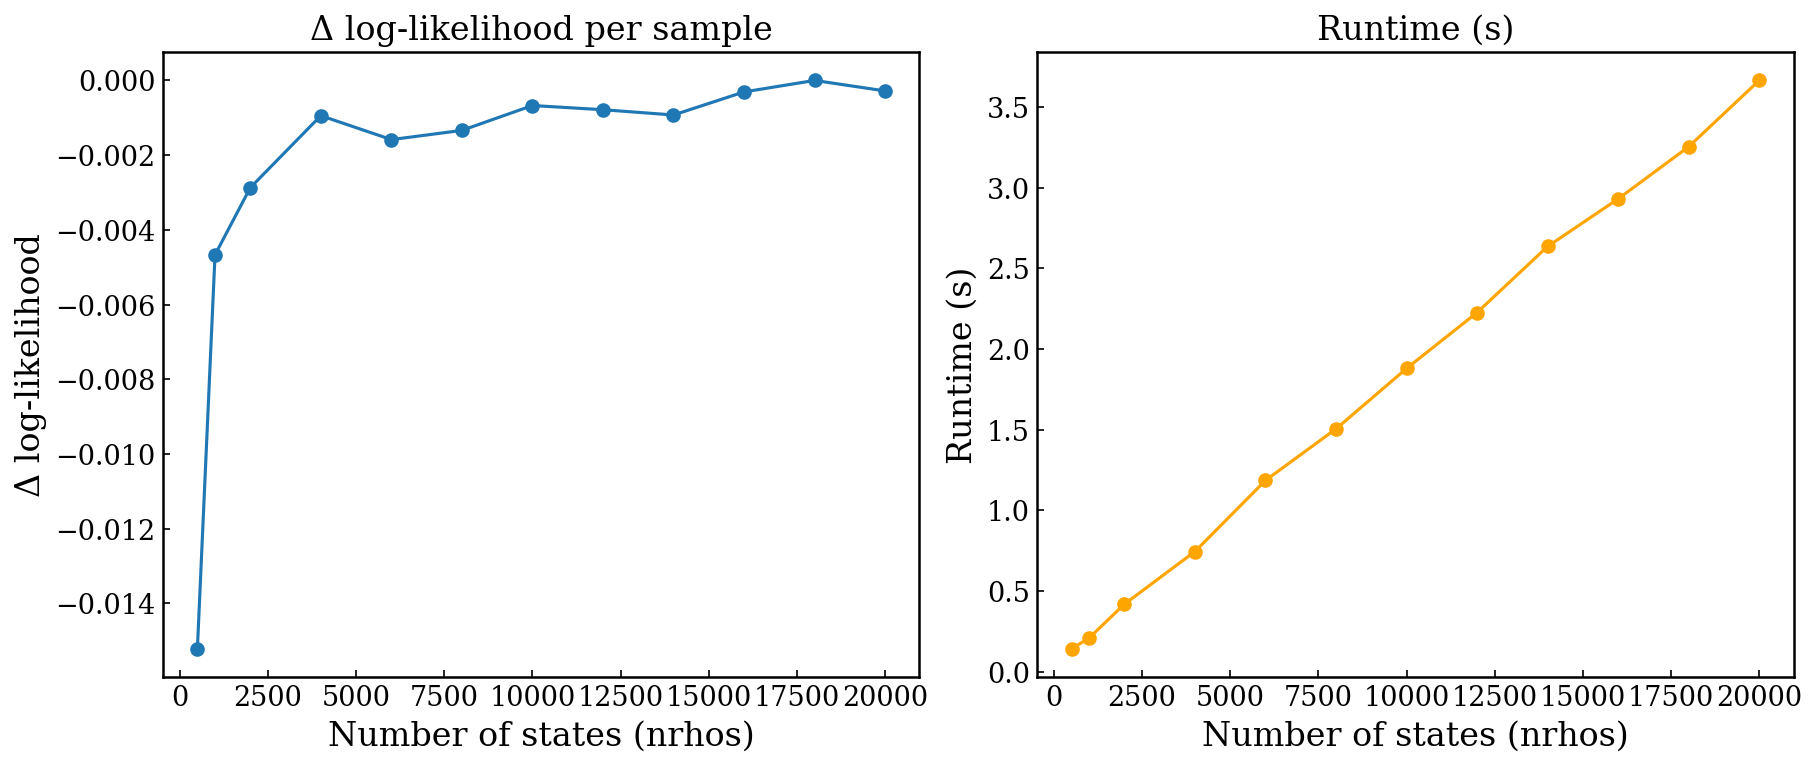

In [24]:
plot_results_rho(delta_ll, runtime_grid, nrhos)